### Name: 
#### 1) ARYAK BHODKE (J005)
#### 2) SAKSHEE THAKKAR (J056)
#### 3) PRAKHAR BANSAL (J069)          
#### 4) KRISHNA PATEL (J227)
### MBA (TECH.), DIV-I
### Business Vizualization IV

### Indian Cuisine Analysis

##### Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

##### This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### 1. Read the indianfood1.csv file into a DataFrame.

In [35]:
df=pd.read_csv('indianfood1.csv')
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [36]:
df.shape

(255, 9)

In [37]:
df.isnull().count()

name              255
ingredients       255
diet              255
prep_time         255
cook_time         255
flavor_profile    255
course            255
state             255
region            255
dtype: int64

### 2. How many total Indian dishes are there?

In [38]:
df['name'].nunique()

255

### 3. How many different set of features are there in every Indian dish?

In [39]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

### 4. Using Describe function, view the basic statistics of all columns. What Inference you can make out form that?

In [40]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


Inference: We observe that the mean of cooking time is greater then cooking time.

### 5. Are there any missing values in the dataset? If Yes,replace the missing values with the NaN values.

In [41]:
df = df.replace(-1,np.nan)
df= df.replace('-1',np.nan)
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN


In [42]:
df.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [43]:
df['prep_time'].fillna(df.prep_time.median(),inplace=True)

### 6. How many numeric features and categorical features are there in the dataset?

In [44]:
df.dtypes

name               object
ingredients        object
diet               object
prep_time         float64
cook_time         float64
flavor_profile     object
course             object
state              object
region             object
dtype: object

Out of these 9 columns: 2 are numeric features while 6 are categorical features

### 7. Added a new column in the dataset that will count the number of ingredients from the ingredients column for each dish.

In [45]:
df['No_of_ingredients']=df.ingredients.apply(lambda x:len(x.split(',')))

In [46]:
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,No_of_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East,2
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North,9
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN,4
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East,3
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN,4


### 8. Add a new column in the dataset to calculate the total time taken to make every dish.

In [47]:
df['totaltime'] = df['prep_time']+df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,No_of_ingredients,totaltime
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,6,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8,55.0


### 9. Barplot using seaborn library to display number of ingredients used in each course.

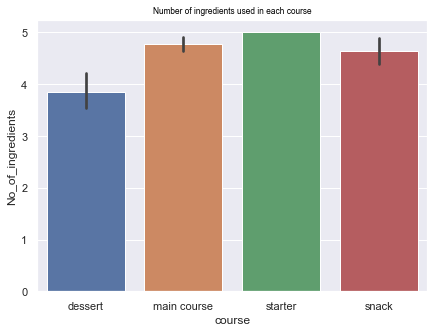

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['course'],y=df['No_of_ingredients']);
plt.title("Number of ingredients used in each course",color='black',fontsize='small');

We see that on an average starters require larger number of ingredients

### 10. Display the top 3 dishes with the most number of ingredients.

In [49]:
df.nlargest(3,'No_of_ingredients')

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,No_of_ingredients,totaltime
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10,45.0
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North,9,60.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8,55.0


### 11. Give a total count of Ingredients that are most used in all the dishes and also visualize it by using barplot from seaborn library.

In [50]:
print(df.ingredients.str.split(',').sum())

['Maida flour', ' yogurt', ' oil', ' sugar', 'Gram flour', ' ghee', ' sugar', 'Carrots', ' milk', ' sugar', ' ghee', ' cashews', ' raisins', 'Flour', ' ghee', ' kewra', ' milk', ' clarified butter', ' sugar', ' almonds', ' pistachio', ' saffron', ' green cardamom', 'Milk powder', ' plain flour', ' baking powder', ' ghee', ' milk', ' sugar', ' water', ' rose water', 'Sugar syrup', ' lentil flour', 'Maida', ' corn flour', ' baking soda', ' vinegar', ' curd', ' water', ' turmeric', ' saffron', ' cardamom', 'Cashews', ' ghee', ' cardamom', ' sugar', 'Milk', ' cottage cheese', ' sugar', 'Milk', ' rice', ' sugar', ' dried fruits', 'Gram flour', ' ghee', ' sugar', 'Yogurt', ' milk', ' nuts', ' sugar', 'Refined flour', ' besan', ' ghee', ' powdered sugar', ' yoghurt', ' green cardamom', 'Firm white pumpkin', ' sugar', ' kitchen lime', ' alum powder', 'Rice', ' sugar', ' nuts', 'Condensed milk', ' sugar', ' spices', ' nuts', 'Semolina', ' ghee', ' nuts', ' milk', 'Khoa', ' coconut', ' molu leaf

In [51]:
# Ingredients that are most used in all the dishes
ingredients = pd.Series(df.ingredients.str.split(',').sum()).value_counts()
ingredients = ingredients[ingredients>10]
ingredients

 sugar                  44
 ginger                 29
 garam masala           27
 curry leaves           25
 ghee                   25
 jaggery                18
 urad dal               17
Rice flour              16
 milk                   15
 tomato                 15
 garam masala powder    12
 mustard oil            12
 sesame seeds           11
Chana dal               11
dtype: int64

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

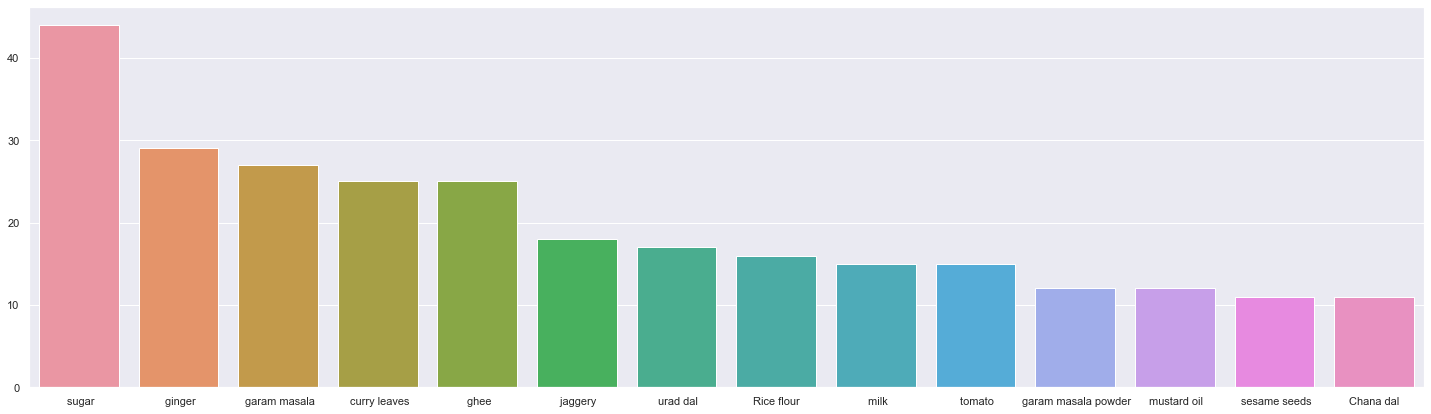

In [52]:
f, ax = plt.subplots(figsize=(25,7))
sns.barplot(ingredients.index, ingredients.values)

We observe that sugar is most used in all the dishes.

### 12. Visualize the number of dishes that are vegetarians and the non-vegetarians and find out the percentage of veg and non veg dishes using pie chart. Write the inference about it.

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='diet'>

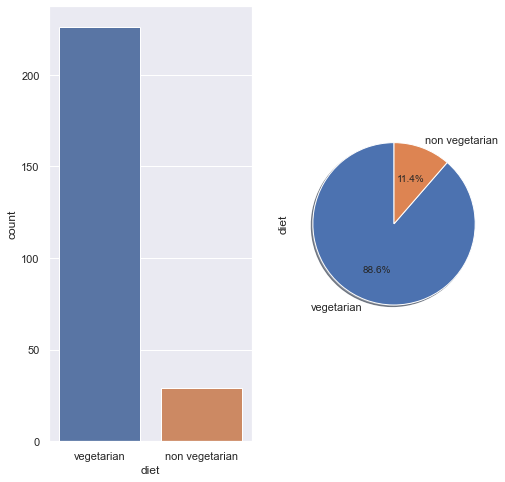

In [53]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))
sns.countplot(df['diet'],ax=ax1[0])
labels = 'vegetarian', 'non vegetarian'
df.diet.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

 In the data, vegetarian food is 88.6%. Most of Indian would like to eat vegetarian food.

### 13. Repeat Q.12 for all categorical features with inferences.

Flavour Profile

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



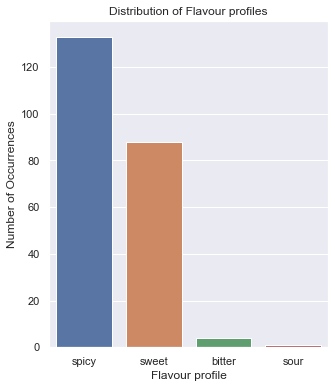

In [54]:
carrier_count = df['flavor_profile'].value_counts()
f, ax = plt.subplots(figsize=(5,6))
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Distribution of Flavour profiles')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flavour profile', fontsize=12)
plt.show()
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor_profile', 'count']
fig = px.pie(pie_df, values='count', names='flavor_profile', title='pie chart of different flavour profiles')
fig.show()

Inference: We see that most dishes in Indian cuisine, i.e, about 59% of them are spicy ; 39% of them are sweet ; 2% of them are bitter while only about 1% of the dishes are sour.


Courses

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



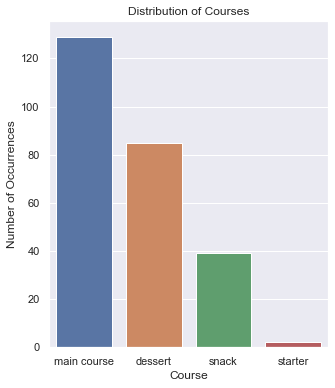

In [55]:
carrier_count = df['course'].value_counts()
f, ax = plt.subplots(figsize=(5,6))
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Distribution of Courses')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Course', fontsize=12)
plt.show()
pie_df = df.course.value_counts().reset_index()
pie_df.columns = ['course', 'count']
fig = px.pie(pie_df, values='count', names='course', title='pie chart of different courses')
fig.show()

Inference: We see that most dishes in Indian cuisine, i.e,  about 51% of them are main course dishes; 34% of them are deserts ; 16%% of them are snacks while only about 1% of the dishes are starters.

State

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



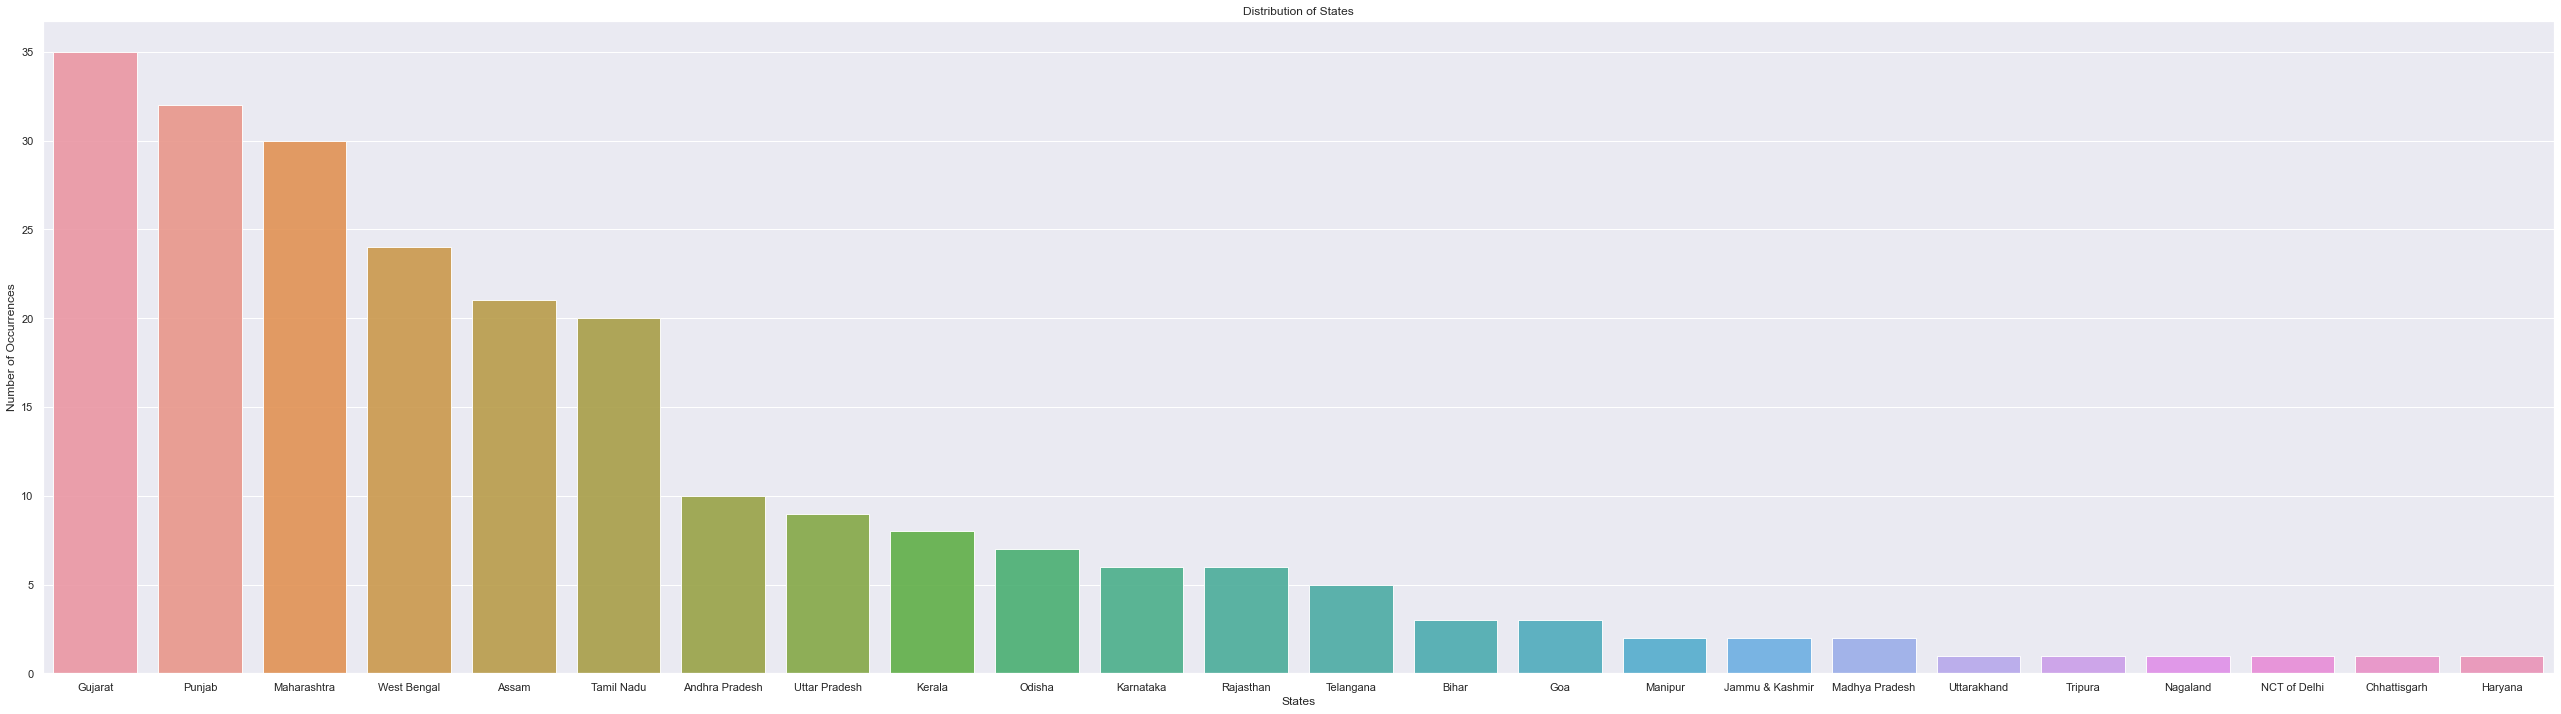

In [56]:
carrier_count = df['state'].value_counts()
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(45,12))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of States')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.show()
pie_df = df.state.value_counts().reset_index()
pie_df.columns = ['state', 'count']
fig = px.pie(pie_df, values='count', names='state', title='Pie chart of different states')
fig.show()

Inference: We see that most dishes in Indian cuisine data set , i.e, about 15% of them are from Gujarat.

Region

C:\Users\BJCRC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



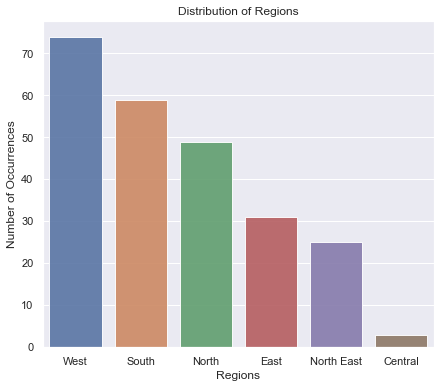

In [57]:
carrier_count = df['region'].value_counts()
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(7,6))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of Regions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Regions', fontsize=12)
plt.show()
pie_df = df.region.value_counts().reset_index()
pie_df.columns = ['region', 'count']
fig = px.pie(pie_df, values='count', names='region', title='pie chart of different regions')
fig.show()

Inference: We see that most dishes in Indian cuisine data set , i.e, about 31% of them are from Western region of India .

### 14. Analyze the relationship between all categorical features with inferences.

Analysis for all the different regions

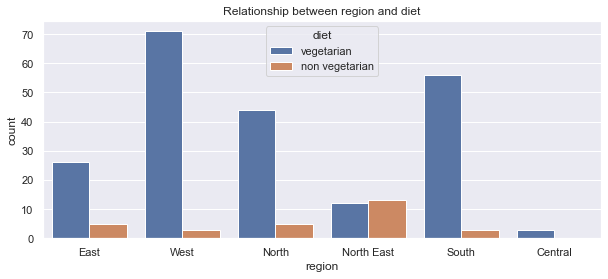

In [58]:
#Relationship between region and diet
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='region', hue='diet', data=df)
axes.set_title('Relationship between region and diet')
plt.show()

Inference: We see that :

1)More of vegetarian food is eaten in the western and southern parts of India

2)More of non vegetarian food is eaten in the North East parts of India

3) In the Central region only Vegetarian food is eaten

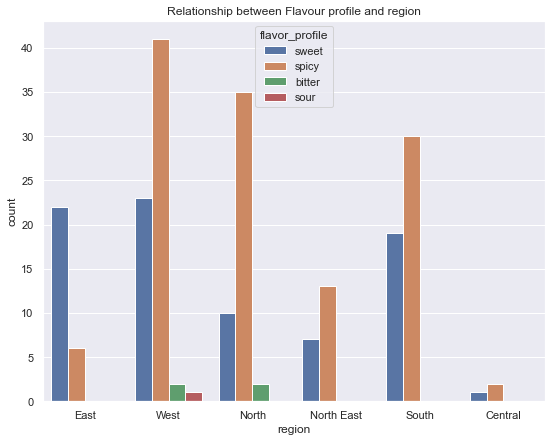

In [59]:
#Relationship between flavour profile and region
fig, axes = plt.subplots(figsize=(9,7))
sns.countplot(x='region', hue='flavor_profile', data=df)
axes.set_title('Relationship between Flavour profile and region')
plt.show()

Inference:

1)In most of the regions spicy flavour is the most prefered.

2) Most number of spicy and sweet dishes come from the western region.

3)In the Eastern regions sweet flavour is more prefered.

4)Sour dishes are found to come from the western region only.

Analysis for all different states

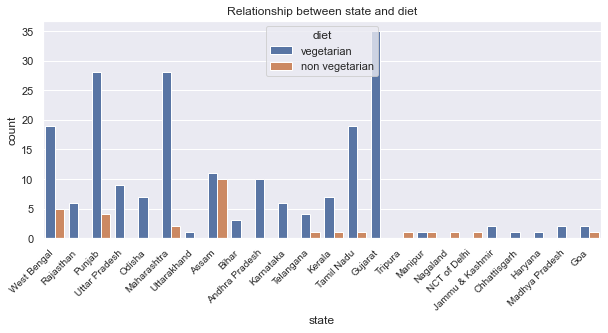

In [60]:
#Relationship between state and diet
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='state', hue='diet', data=df)
axes.set_title('Relationship between state and diet')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

Inference:

1) States like Gujrat, Andhra Pradesh ,Karnataka, Uttar Pradesh , Odisha , J&K , Haryana , Chattisgarh,Madhya Pradesh , Rajasthan and Bihar have only vegetarian food .

2) Most number of vegetarian dishes come from Gujrat

3) States like Tripura , Delhi and Nagaland have only non vegetarian food.

4) Most number of non vegetarian dishes come from Assam

5) Others have both non veg and veg food.

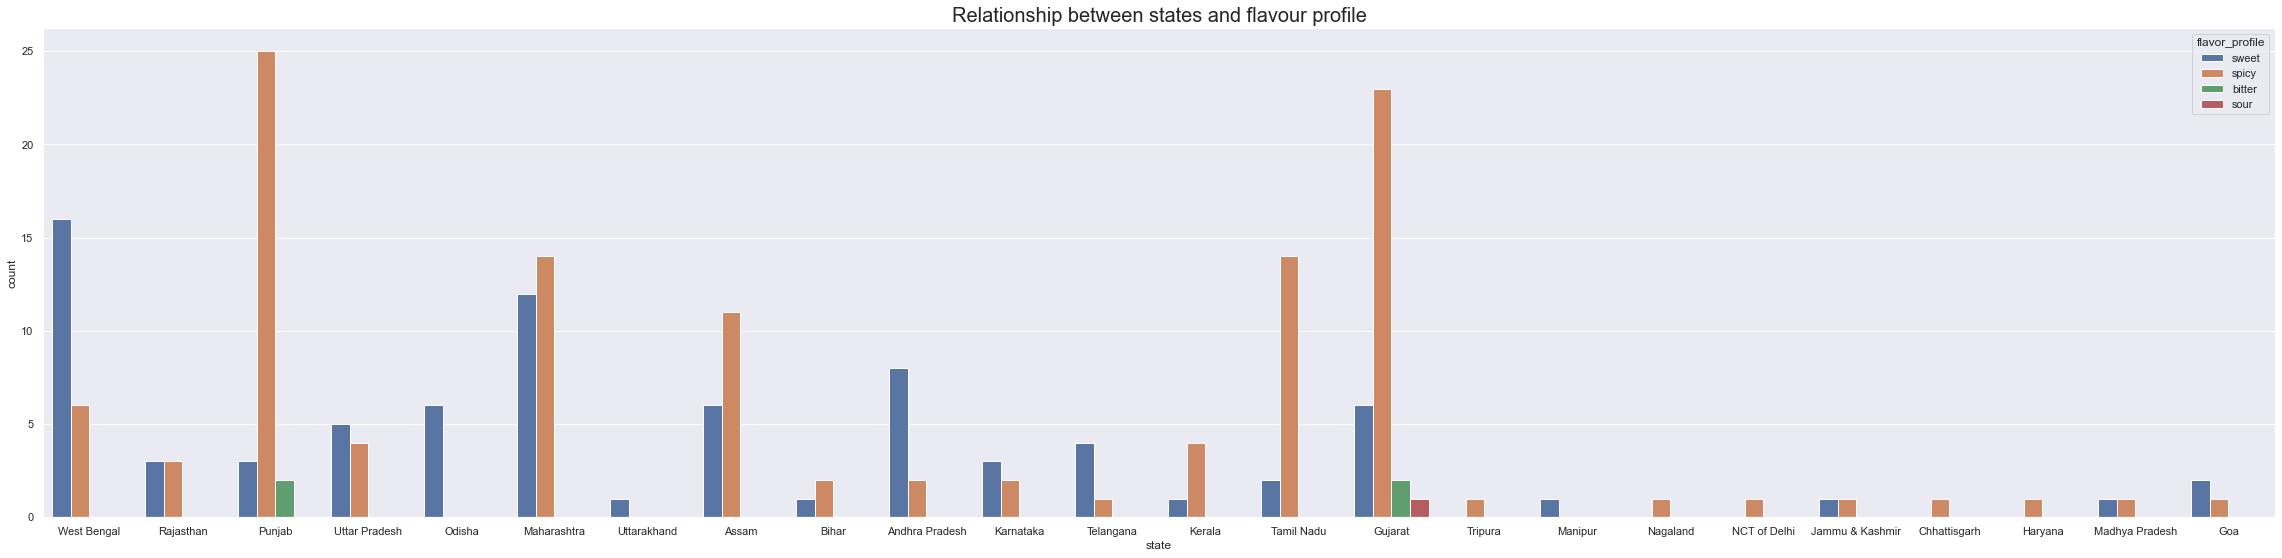

In [61]:
#Relationship between states and flavour profile
fig, axes = plt.subplots(figsize=(40,9))
sns.countplot(x='state', hue='flavor_profile', data=df)
axes.set_title('Relationship between states and flavour profile',fontsize=20)
plt.show()

Inference:

1) Most number of spicy dishes come from Punjab.

2)Most number of sweet dishes come from West Bengal.

3) More number of bitter dishes come from Guajrat

4)Sour dishes are only originating from Guajrat

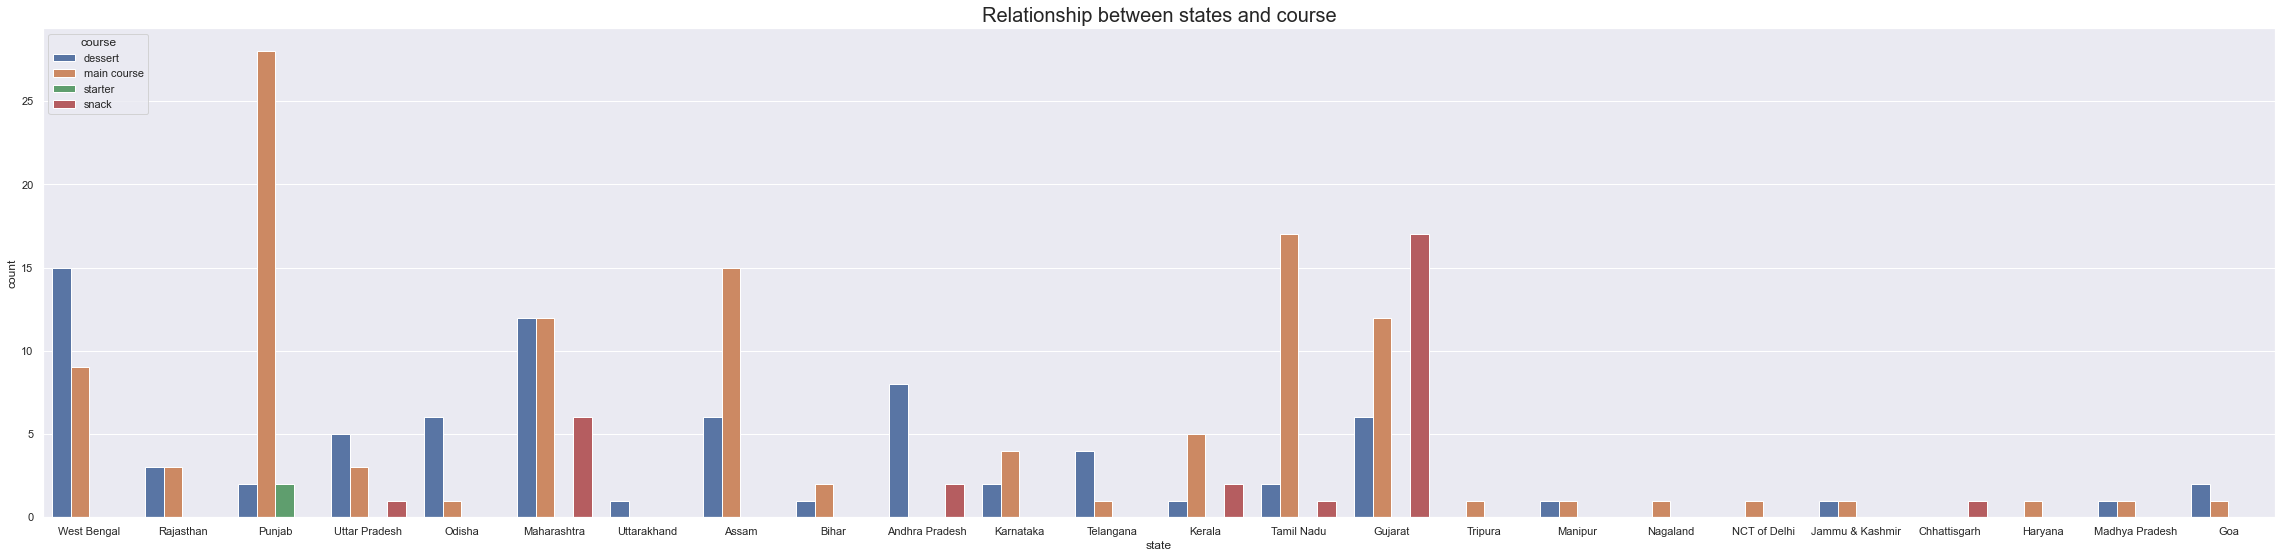

In [62]:
#Relationship between states and courses
fig, axes = plt.subplots(figsize=(40,9))
sns.countplot(x='state', hue='course', data=df)
axes.set_title('Relationship between states and course',fontsize=20)
plt.show()

Inference:

1)Most main course dishes come from Punjab

2)Starters are also only from punjab

3)Deserts from West Baengal are more in number

4) Most number of snacks also come from Gujrat

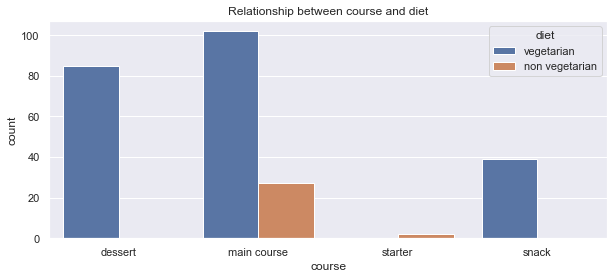

In [63]:
#Relationship between course and diet
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='course', hue='diet', data=df)
axes.set_title('Relationship between course and diet')
plt.show()

Inference: We see that:

1) Deserts and snacks consist of only vegetarian food

2) Main course consists mostly of vegetarian food

3) Starters consist of only non vegetarian food

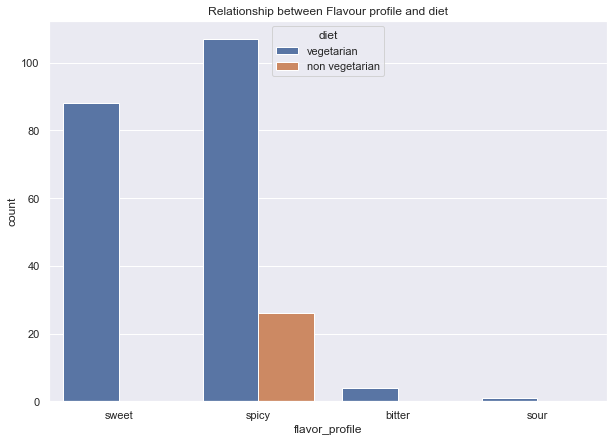

In [64]:
#Relationship between flavour profile and diet
fig, axes = plt.subplots(figsize=(10,7))
sns.countplot(x='flavor_profile', hue='diet', data=df)
axes.set_title('Relationship between Flavour profile and diet')
plt.show()

Inference:

1) Dishes of sweet, sour and bitter flavours are completly vegetarian

2) There are more vegetarian spicy dishes than there are non vegetarian

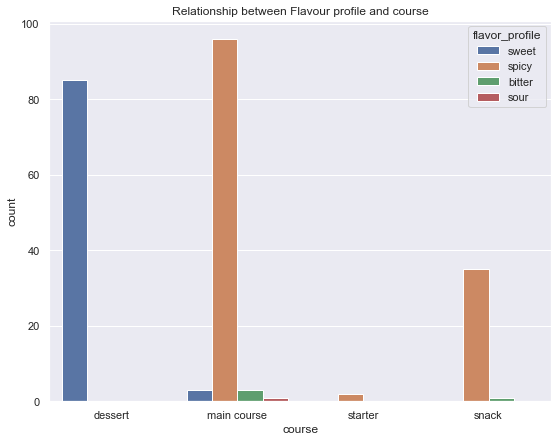

In [65]:
#Relationship between flavour profile and course
fig, axes = plt.subplots(figsize=(9,7))
sns.countplot(x='course', hue='flavor_profile', data=df)
axes.set_title('Relationship between Flavour profile and course')
plt.show()

Inference:

1)Most of the main course dishes and snacks are spicy

2) The starters consist of only spicy dishes

3) Bitter and sour dishes are found in the maincourse only

### 15. Analysis of preparation time , cooking time and total time- Plot a histogram for preparation time the number of dishes taking different ranges of the preparation time

<AxesSubplot:title={'center':'prep_time'}, ylabel='Frequency'>

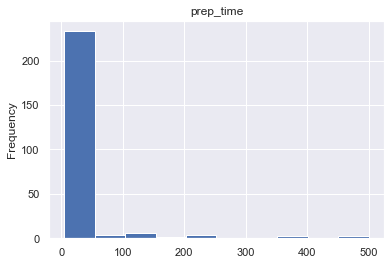

In [66]:
fig, axes = plt.subplots()
axes.set_title('prep_time')
df.prep_time.plot(kind='hist')

Inference: We can say that most dishes require a preparation time between 10 to 50 mins.

### 16. Analyze the preparation time and cooking time required for each course.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'dessert'),
  Text(1, 0, 'main course'),
  Text(2, 0, 'starter'),
  Text(3, 0, 'snack')])

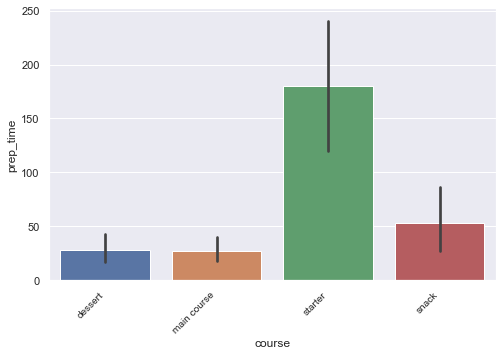

In [67]:
ig=plt.figure(figsize=(8,5))
sns.barplot(x='course',y='prep_time',data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)


Inference: We can say that starter requires most time in prepartion

(array([0, 1, 2, 3]),
 [Text(0, 0, 'dessert'),
  Text(1, 0, 'main course'),
  Text(2, 0, 'starter'),
  Text(3, 0, 'snack')])

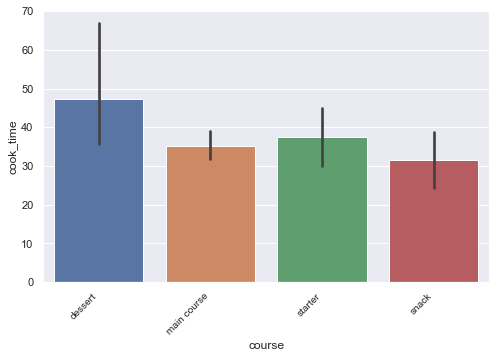

In [68]:
ig=plt.figure(figsize=(8,5))
sns.barplot(x='course',y='cook_time',data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)


Inference: We Observe that desert take maximum cooking time 

### 17. Compare the preparation time and cook time for each course.

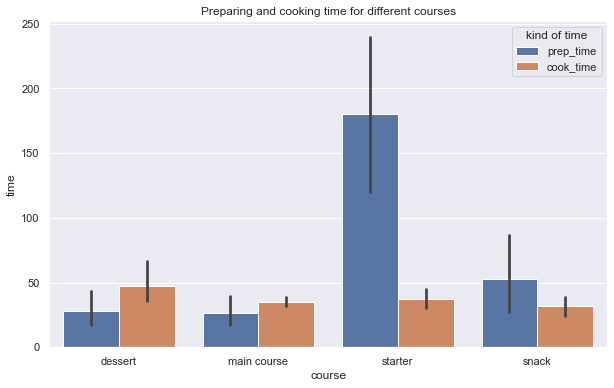

In [69]:
df_time = df[['prep_time', 'cook_time', 'course']]
df_time_melt = pd.melt(df_time, id_vars='course', value_vars=['prep_time', 'cook_time'], var_name='kind of time', value_name='time')
df_time_melt
fig, axes = plt.subplots(figsize = (10, 6))
sns.barplot( x ='course', y='time', hue = 'kind of time', data = df_time_melt)
axes.set_title('Preparing and cooking time for different courses')
plt.show()


Inference :

1) It takes longer to prepare for starters than any other course.

2) It takes much lesser time to cook the starters and snacks than to prepare them.

3) While it takes longer to cook desserts and main course dishes than it takes to prepare for them

### 18. Compare cooking time and preparation time for dishes of certain course and certain flavor profile.

Text(0.5, 0.98, 'Cook time Vs diet plot on the basis of Flavour Profile')

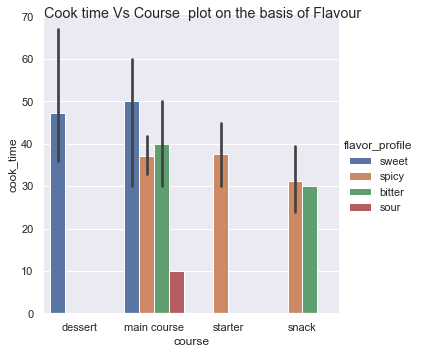

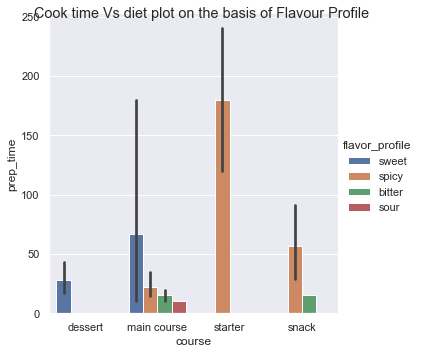

In [70]:
b=sns.catplot(data=df, kind="bar", x="course", y="cook_time", hue="flavor_profile")
b.fig.suptitle('Cook time Vs Course  plot on the basis of Flavour')

d=sns.catplot(data=df, kind="bar", x="course", y="prep_time", hue="flavor_profile")
d.fig.suptitle('Cook time Vs diet plot on the basis of Flavour Profile')

Inference:

1) In main course:

The sweet flavoured dishes take longer to be prepared than to be cooked
The bitter and the spicy dishes take longer to be cooked than to be prpared
2)In snacks:

The bitter snacks take longer to be cooked.
The spicy snacks take longer to be prepared for.

### 19. Compare cooking time and preparation time for dishes from certain state and of certain diet

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'West Bengal'),
  Text(1, 0, 'Rajasthan'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Uttar Pradesh'),
  Text(4, 0, 'Odisha'),
  Text(5, 0, 'Maharashtra'),
  Text(6, 0, 'Uttarakhand'),
  Text(7, 0, 'Assam'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Andhra Pradesh'),
  Text(10, 0, 'Karnataka'),
  Text(11, 0, 'Telangana'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Tamil Nadu'),
  Text(14, 0, 'Gujarat'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Manipur'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'NCT of Delhi'),
  Text(19, 0, 'Jammu & Kashmir'),
  Text(20, 0, 'Chhattisgarh'),
  Text(21, 0, 'Haryana'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Goa')])

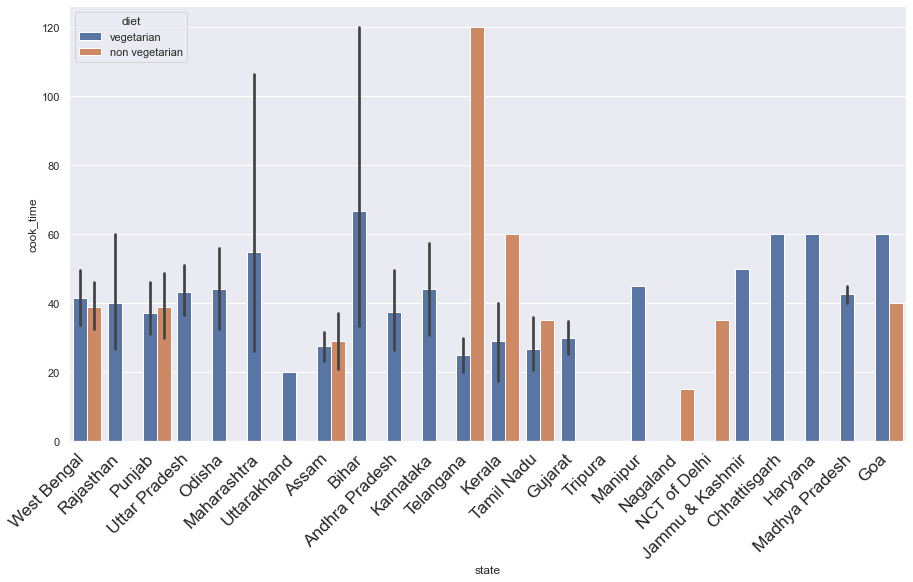

In [71]:
#Statewise breakdown of diets
fig=plt.figure(figsize=(15,8))
sns.barplot(x='state',y='cook_time',hue='diet',data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Inference: 
In rajasthan,uttar pradesh,odish,maharashtra,bihar,andhra pradesh,manipur,chandigarh,haryana,madhya pradesh mostly people in these states are vegetarian.

### 20. Display the total time taken to make every diet, to make every course, to make every flavor profile

<AxesSubplot:xlabel='totaltime', ylabel='diet'>

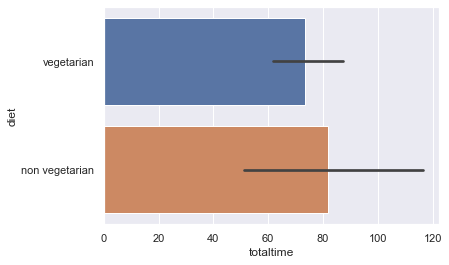

In [72]:
sns.barplot(x=df.totaltime,y=df.diet)

Inference : We see that non vegetarian food takes longer to be made than vegetarian food.

<AxesSubplot:xlabel='totaltime', ylabel='course'>

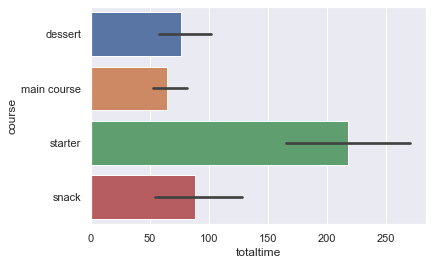

In [73]:
sns.barplot(x=df.totaltime,y=df.course)

Inference : We see that the total time taken to make starters is longer than the time taken to make any other course.

<AxesSubplot:xlabel='prep_time', ylabel='flavor_profile'>

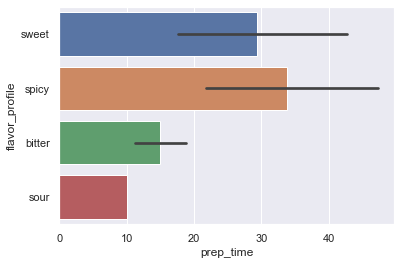

In [74]:
sns.barplot(x=df.prep_time,y=df.flavor_profile)

Inference: We see that it takes longer time to prepare sweet flavoured dishes than compared to other

### 21. Display the top 10 dishes in maincourse that take maximum totaltime.

Text(0.5, 1.0, 'Top-10 Dishes wih Maximum Total Time(Prepration_time + Cooking_time)')

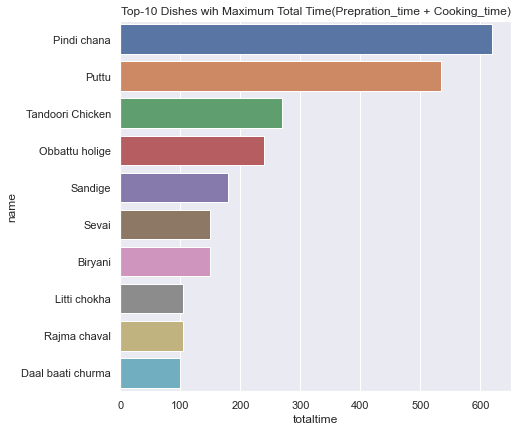

In [75]:
down_main = df[df.course == "main course"].sort_values('totaltime', ascending = 0)[:10]
plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = down_main.name, x = down_main.totaltime)
plt.title("Top-10 Dishes wih Maximum Total Time(Prepration_time + Cooking_time)")

Inference : Pindi Channa is the maincourse dish that takes the longest to be made

### 22. Display the top 10 dishes in sweet flavor that take maximum totaltime

Text(0.5, 1.0, 'Top-10 Dishes wih Sweet Flavor Maximum Total Time(Prepration_time + Cooking_time)')

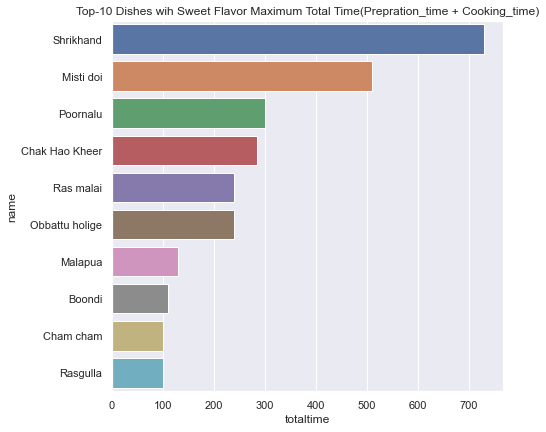

In [76]:
down_main = df[df.flavor_profile == "sweet"].sort_values('totaltime', ascending = 0)[:10]
plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = down_main.name, x = down_main.totaltime)
plt.title("Top-10 Dishes wih Sweet Flavor Maximum Total Time(Prepration_time + Cooking_time)")

Inference: Shrikhand is the sweet flavoured dish that takes the longest to be made

### 23. Display the top 10 dishes with maximum total time in the entire dataset

Text(0.5, 1.0, 'Top-10 Dishes wih Maximum Total Time(Prepration_time + Cooking_time)')

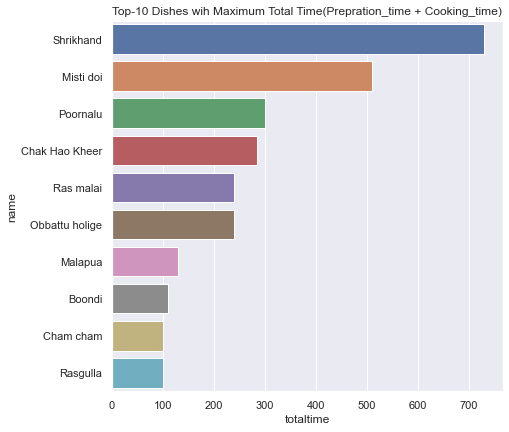

In [77]:
down_dishes = df.sort_values('totaltime', ascending = 0)[:10]
plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = down_main.name, x = down_main.totaltime)
plt.title("Top-10 Dishes wih Maximum Total Time(Prepration_time + Cooking_time)")

Inference: Shrikhand also takes the longest to be made from all the dishes in the data

### 24. Display the top 10 dishes with minimum total time in the entire dataset

In [78]:
df.nsmallest(10,'totaltime')

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,No_of_ingredients,totaltime
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,4,10.0
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,NaN,NaN,4,10.0
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South,3,10.0
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West,4,15.0
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15.0,2.0,spicy,snack,NaN,NaN,5,17.0
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,6,20.0
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10.0,10.0,NaN,main course,Maharashtra,West,4,20.0
169,Bajri no rotlo,"Wheat flour, pearl millet flour, hot water",vegetarian,10.0,10.0,spicy,main course,Gujarat,West,3,20.0
175,Chorafali,"Urad dal, bengal gram flour, dried mango, baki...",vegetarian,5.0,15.0,spicy,snack,Gujarat,West,5,20.0
190,Keri no ras,"Mango, sugar",vegetarian,10.0,10.0,sour,main course,Gujarat,West,2,20.0


Inference: Lassi takes lowest time

### 25. Look for correlations between columns. Does it reveal anything? Can also use Heatmap to the show the relation between the numeric variables.

In [79]:
cor=df.corr()

<AxesSubplot:>

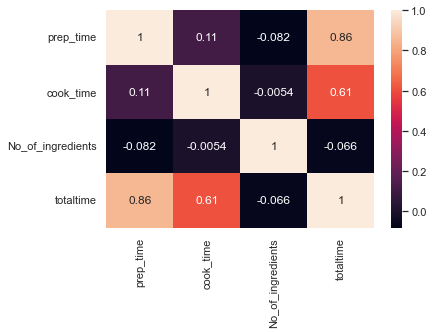

In [80]:
sns.heatmap(cor,annot=True)

### 26. What else can you understand from the data?

After having done the EDA we come to know the the distribution of various dishes through out the various states of the country and regions, as well as the total time taken to prepare it, the ingredients used in making them and their flavour profiles. Using this we can then build a model for an Indian food recommendation system at any restaurants or food delivery applications using the features total time, number of ingredients used, flavour profile and type of diet as primary determinants or filters.